In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
product_embeddings = pd.read_csv("https://github.com/ardahk/amex/raw/refs/heads/main/data/name_embeddings.csv")
brand_embeddings = pd.read_csv("https://github.com/ardahk/amex/raw/refs/heads/main/data/brand_embeddings.csv")
products = pd.read_csv('https://github.com/ardahk/amex/raw/refs/heads/main/data/products.csv')
order_items = pd.read_csv('https://github.com/ardahk/amex/raw/refs/heads/main/data/order_items.csv')
users = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/refs/heads/main/data/users_final.csv')

# TO DO: FORMATTING DATA
## Products
- Merge product name & brand embeddings to products dataframe
- Convert 'department' and 'category' to dummy variables
- Flatten all embeddings so they're able to be used as input to the model
- Drop product_id and distribution_center_id

## Users
- Convert 'gender', 'status', and 'traffic source' to dummy variables
- Merge 'order_items' and 'users' to be able to extract 'product_id', in order to be able to create the label
- Drop user_id, order_id, and inventory_item_id


## PRODUCTS

In [ ]:
brand_embeddings.head()

,brand,brand_embedding
0,MG,"[0.445360004901886, 0.5872200131416321, 1.2546..."
1,MG,"[0.445360004901886, 0.5872200131416321, 1.2546..."
2,MG,"[0.445360004901886, 0.5872200131416321, 1.2546..."
3,MG,"[0.445360004901886, 0.5872200131416321, 1.2546..."
4,MG,"[0.445360004901886, 0.5872200131416321, 1.2546..."


In [ ]:
product_embeddings.head()

,product_id,name_embedding
0,9588,"[-0.4065183401107788, 0.31074419617652893, -0...."
1,1238,"[-0.41240498423576355, 0.5829450488090515, -0...."
2,5485,"[-0.23880276083946228, 0.3456690013408661, -0...."
3,5485,"[-0.23880276083946228, 0.3456690013408661, -0...."
4,5485,"[-0.23880276083946228, 0.3456690013408661, -0...."


- merge product name & brand embeddings to products dataframe

In [ ]:
products_final = pd.merge(left = products, right = product_embeddings, left_on='id', right_on='product_id')

In [ ]:
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [ ]:
products_final.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,product_id,name_embedding
0,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1,13928,"[-0.5451024770736694, -0.34113600850105286, -0..."
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1,13928,"[-0.5451024770736694, -0.34113600850105286, -0..."
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1,14115,"[0.1337980031967163, -0.20477981865406036, 0.0..."
3,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1,14273,"[-0.40627333521842957, 0.14057165384292603, -0..."
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1,14273,"[-0.40627333521842957, 0.14057165384292603, -0..."


In [ ]:
products_final = pd.merge(left = products_final, right = brand_embeddings, on='brand')

In [ ]:
products_final = products_final.drop_duplicates(subset='product_id')

- convert 'department' and 'category' to dummy variables

In [ ]:
products_final = pd.get_dummies(products_final, columns = ['department', 'category'], dtype=int)

- drop product_id, distribution_center_id, and any initial features which were converted

In [ ]:
products_final.drop(columns = ['id', 'name', 'distribution_center_id', 'sku', 'brand'], inplace = True)

In [ ]:
products_final.head()

,cost,retail_price,product_id,name_embedding,brand_embedding,department_Men,department_Women,category_Accessories,category_Active,category_Blazers & Jackets,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,2.33835,5.95,13928,"[-0.5451024770736694, -0.34113600850105286, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,4.87956,10.99,14115,"[0.1337980031967163, -0.20477981865406036, 0.0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39,6.50793,15.99,14273,"[-0.40627333521842957, 0.14057165384292603, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
65,3.10625,6.25,15674,"[-0.515715479850769, -0.21141724288463593, -0....","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,2.67594,6.18,28670,"[-0.6392737627029419, -0.10372474789619446, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
products_final.shape

(13961, 33)

In [ ]:
products_final.dtypes

,0
cost,float64
retail_price,float64
product_id,int64
name_embedding,object
brand_embedding,object
department_Men,int64
department_Women,int64
category_Accessories,int64
category_Active,int64
category_Blazers & Jackets,int64


In [ ]:
products_final.columns

Index(['cost', 'retail_price', 'product_id', 'name_embedding',
       'brand_embedding', 'department_Men', 'department_Women',
       'category_Accessories', 'category_Active', 'category_Blazers & Jackets',
       'category_Clothing Sets', 'category_Dresses',
       'category_Fashion Hoodies & Sweatshirts', 'category_Intimates',
       'category_Jeans', 'category_Jumpsuits & Rompers', 'category_Leggings',
       'category_Maternity', 'category_Outerwear & Coats', 'category_Pants',
       'category_Pants & Capris', 'category_Plus', 'category_Shorts',
       'category_Skirts', 'category_Sleep & Lounge', 'category_Socks',
       'category_Socks & Hosiery', 'category_Suits',
       'category_Suits & Sport Coats', 'category_Sweaters', 'category_Swim',
       'category_Tops & Tees', 'category_Underwear'],
      dtype='object')

## PCA

Using dimensionality reduction to be able to include the text embeddings in the model

- convert to numeric since they're originally strings

In [ ]:
products_final["name_embedding"] = products_final["name_embedding"].apply(ast.literal_eval)
products_final["brand_embedding"] = products_final["brand_embedding"].apply(ast.literal_eval)

- convert to list to be able to combine and standardize

In [ ]:
name_embeddings = np.array(products_final['name_embedding'].tolist())
brand_embeddings = np.array(products_final['brand_embedding'].tolist())

- combine into matrix and standardize

In [ ]:
scaler = StandardScaler()
standardized_name_embeddings = scaler.fit_transform(name_embeddings)
standardized_brand_embeddings = scaler.fit_transform(brand_embeddings)

- apply PCA

In [ ]:
pca_name = PCA()
pca_brand = PCA()
name_principal_components = pca_name.fit_transform(standardized_name_embeddings)
brand_principal_components = pca_brand.fit_transform(standardized_brand_embeddings)

- find optimal number of components to keep

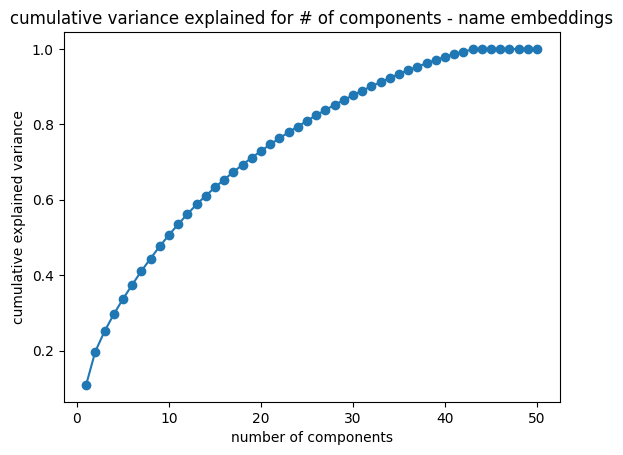

In [ ]:
cumulative_variance_name = np.cumsum(pca_name.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_name) + 1), cumulative_variance_name, marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('cumulative variance explained for # of components - name embeddings')
plt.show()

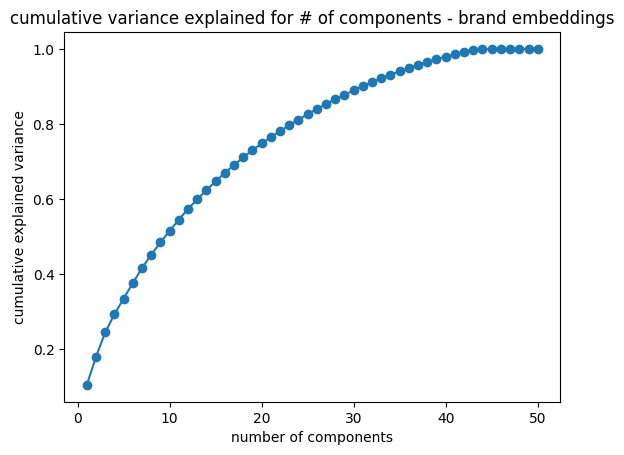

In [ ]:
cumulative_variance_brand = np.cumsum(pca_brand.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_brand) + 1), cumulative_variance_brand, marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('cumulative variance explained for # of components - brand embeddings')
plt.show()

In [ ]:
target_variance = 0.90

In [ ]:
num_components_name = np.argmax(cumulative_variance_name >= target_variance) + 1
print("Number of components needed to explain", target_variance * 100, "% of the variance (name) = ", num_components_name)
num_components_brand = np.argmax(cumulative_variance_brand >= target_variance) + 1
print("Number of components needed to explain", target_variance * 100, "% of the variance (brand) = ", num_components_brand)

Number of components needed to explain 90.0 % of the variance (name) =  32
Number of components needed to explain 90.0 % of the variance (brand) =  31


- extract required # of components

In [ ]:
name_principal_components_reduced = name_principal_components[:, :num_components_name]
brand_principal_components_reduced = brand_principal_components[:, :num_components_brand]

- add the components back as features to the dataset

In [ ]:
products_with_pca = products_final.copy()

In [ ]:
for i in range(num_components_name):
    products_with_pca[f'name_pca_component_{i+1}'] = name_principal_components_reduced[:, i]
for i in range(num_components_brand):
    products_with_pca[f'brand_pca_component_{i+1}'] = brand_principal_components_reduced[:, i]

In [ ]:
products_with_pca.head()

,cost,retail_price,product_id,name_embedding,brand_embedding,department_Men,department_Women,category_Accessories,category_Active,category_Blazers & Jackets,...,brand_pca_component_22,brand_pca_component_23,brand_pca_component_24,brand_pca_component_25,brand_pca_component_26,brand_pca_component_27,brand_pca_component_28,brand_pca_component_29,brand_pca_component_30,brand_pca_component_31
0,2.33835,5.95,13928,"[-0.5451024770736694, -0.34113600850105286, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
26,4.87956,10.99,14115,"[0.1337980031967163, -0.20477981865406036, 0.0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
39,6.50793,15.99,14273,"[-0.40627333521842957, 0.14057165384292603, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
65,3.10625,6.25,15674,"[-0.515715479850769, -0.21141724288463593, -0....","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,0,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
78,2.67594,6.18,28670,"[-0.6392737627029419, -0.10372474789619446, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",1,0,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289


- now we have 96 features.

## USERS

- Convert 'gender', 'status', and 'traffic source' to dummy variables

In [ ]:
users_final = pd.get_dummies(users, columns = ['gender', 'status', 'traffic_source'], dtype = int)

- Merge 'order_items' and 'users' to be able to extract 'product_id', in order to be able to create the label

In [ ]:
users_final = pd.merge(left = users_final, right = order_items[['user_id', 'product_id']], left_on= 'id', right_on = 'user_id')

- Drop user_id, order_id, and inventory_item_id

In [ ]:
users_final.drop(columns = ['id', 'order_id', 'month_day'], inplace = True)

In [ ]:
users_final.head()

,age,postal_code,avg_sequence_number,num_of_item,gender_F,gender_M,status_Cancelled,status_Complete,status_Processing,status_Returned,status_Shipped,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search,user_id,product_id
0,44,36303,5.0,1,0,1,0,1,0,0,0,0,0,0,1,0,5399,27958
1,55,36303,13.0,4,1,0,0,0,1,0,0,0,0,1,0,0,42412,7012
2,55,36303,13.0,4,1,0,0,0,1,0,0,0,0,1,0,0,42412,9230
3,55,36303,13.0,4,1,0,0,0,1,0,0,0,0,1,0,0,42412,4653
4,55,36303,13.0,4,1,0,0,0,1,0,0,0,0,1,0,0,42412,3855


In [ ]:
users_final.columns

Index(['age', 'postal_code', 'avg_sequence_number', 'num_of_item', 'gender_F',
       'gender_M', 'status_Cancelled', 'status_Complete', 'status_Processing',
       'status_Returned', 'status_Shipped', 'traffic_source_Display',
       'traffic_source_Email', 'traffic_source_Facebook',
       'traffic_source_Organic', 'traffic_source_Search', 'user_id',
       'product_id'],
      dtype='object')

### Check and make sure all columns are integers

In [ ]:
users_final.dtypes

,0
age,int64
postal_code,int64
avg_sequence_number,float64
num_of_item,int64
gender_F,int64
gender_M,int64
status_Cancelled,int64
status_Complete,int64
status_Processing,int64
status_Returned,int64


In [ ]:
products_final.dtypes

,0
cost,float64
retail_price,float64
product_id,int64
name_embedding,object
brand_embedding,object
department_Men,int64
department_Women,int64
category_Accessories,int64
category_Active,int64
category_Blazers & Jackets,int64


Everything is an integer except for the embeddings, which are objects but we will check and make sure they can be used as input for the model since they were converted from strings to numpy arrays.

# MODEL

I encountered an issue when trying to engineer the label, some product IDs exist only in the products or the users table.

In [ ]:
unique_in_users = set(users_final['product_id']) - set(products_final['product_id'])
print("Number of ID's just in users: ", len(unique_in_users))

unique_in_products = set(products_final['product_id']) - set(users_final['product_id'])
print("Number of ID's just in products: ", len(unique_in_products))

Number of ID's just in users:  7638
Number of ID's just in products:  161


Therefore we will only keep instances where : Users have purchased a product that has existed within our database, and products have been purchased by a user that exists within our database

In [ ]:
common_ids = set(users_final['product_id']).intersection(set(products_final['product_id']))
# filter dataframe to only include the intersection
users_final = users_final[users_final['product_id'].isin(common_ids)]
products_final = products_final[products_final['product_id'].isin(common_ids)]

In [ ]:
users_final.shape

(57696, 18)

In [ ]:
users_final.columns

Index(['age', 'postal_code', 'avg_sequence_number', 'num_of_item', 'gender_F',
       'gender_M', 'status_Cancelled', 'status_Complete', 'status_Processing',
       'status_Returned', 'status_Shipped', 'traffic_source_Display',
       'traffic_source_Email', 'traffic_source_Facebook',
       'traffic_source_Organic', 'traffic_source_Search', 'user_id',
       'product_id'],
      dtype='object')

In [ ]:
products_final.head()

,cost,retail_price,product_id,name_embedding,brand_embedding,department_Men,department_Women,category_Accessories,category_Active,category_Blazers & Jackets,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,2.33835,5.95,13928,"[-0.5451024770736694, -0.34113600850105286, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,4.87956,10.99,14115,"[0.1337980031967163, -0.20477981865406036, 0.0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39,6.50793,15.99,14273,"[-0.40627333521842957, 0.14057165384292603, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
65,3.10625,6.25,15674,"[-0.515715479850769, -0.21141724288463593, -0....","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,2.67594,6.18,28670,"[-0.6392737627029419, -0.10372474789619446, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
products_final.reset_index(drop=True, inplace=True)

In [ ]:
products_final.head()

,cost,retail_price,product_id,name_embedding,brand_embedding,department_Men,department_Women,category_Accessories,category_Active,category_Blazers & Jackets,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,2.33835,5.95,13928,"[-0.5451024770736694, -0.34113600850105286, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.87956,10.99,14115,"[0.1337980031967163, -0.20477981865406036, 0.0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.50793,15.99,14273,"[-0.40627333521842957, 0.14057165384292603, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.10625,6.25,15674,"[-0.515715479850769, -0.21141724288463593, -0....","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.67594,6.18,28670,"[-0.6392737627029419, -0.10372474789619446, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
products_final.shape

(13800, 33)

In [ ]:
products_final.columns

Index(['cost', 'retail_price', 'product_id', 'name_embedding',
       'brand_embedding', 'department_Men', 'department_Women',
       'category_Accessories', 'category_Active', 'category_Blazers & Jackets',
       'category_Clothing Sets', 'category_Dresses',
       'category_Fashion Hoodies & Sweatshirts', 'category_Intimates',
       'category_Jeans', 'category_Jumpsuits & Rompers', 'category_Leggings',
       'category_Maternity', 'category_Outerwear & Coats', 'category_Pants',
       'category_Pants & Capris', 'category_Plus', 'category_Shorts',
       'category_Skirts', 'category_Sleep & Lounge', 'category_Socks',
       'category_Socks & Hosiery', 'category_Suits',
       'category_Suits & Sport Coats', 'category_Sweaters', 'category_Swim',
       'category_Tops & Tees', 'category_Underwear'],
      dtype='object')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dot, BatchNormalization, Dropout
from tensorflow.keras.models import Model

In [ ]:
user_input = Input(shape=(16,), name='user_input')
item_input = Input(shape=(30,), name='item_input')

In [ ]:
user_tower = Dense(128, activation='relu')(user_input)
user_tower = BatchNormalization()(user_tower)
item_tower = Dense(128, activation='relu')(item_input)
item_tower = BatchNormalization()(item_tower)

In [ ]:
dot_product = Dot(axes=1, normalize=False, name="dot_product")([user_tower, item_tower])

In [ ]:
output = Dense(1, activation='sigmoid', name="output")(dot_product)

In [ ]:
model = Model(inputs=[user_input, item_input], outputs=output)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 16)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 30)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │          2,176 │ user_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │          3,968 │ item_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128)            │            512 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_product (Dot)         │ (None, 1)              │              0 │ batch_normalization_2… │
│                           │                        │                │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │              2 │ dot_product[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,170 (28.01 KB)

 Trainable params: 6,658 (26.01 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
def create_labels_and_train(users_df, products_df, model, batch_size, num_epochs):
    for epoch in range(num_epochs):
        # initilize the target similarity for the bath
        target_similarity = []

        # we're making the target similarity balanced, so there's an equal number of posivie and negetive indices in each batch
        num_indices = batch_size // 2

        # generating 1/2 batch size of random pairs, where there are posivive indices (user and product have the same ID)
        positive_user_indices = np.random.randint(0, len(users_df), size=num_indices)
        # initizie storage of positive indicies
        positive_product_indices = []
        # loop over every user
        for user_idx in positive_user_indices:
            # locating product IDs in the user dataframe for the user we sampled
            user_product_id = users_df.iloc[user_idx]['product_id']
            # finding matching products in the products dataframe
            matching_products = products_df[products_df['product_id'] == user_product_id]
            # append the matching product to the positive product indices
            positive_product_indices.append(matching_products.index[0])

        # Generate random negative pairs (user and product have different product_ids)
        negative_user_indices = np.random.randint(0, len(users_df), size=num_indices)
        #print("NEGATIVE USER INDICES: ", negative_user_indices)
        negative_product_indices = []
        for user_idx in negative_user_indices:
            user_product_id = users_df.iloc[user_idx]['product_id']
            # find a product that doesn't have a matching product id
            non_matching_products = products_df[products_df['product_id'] != user_product_id]
            # append that to the negetive indicies
            negative_product_indices.append(non_matching_products.sample(1).index[0])

        # combining both positive and negetive indicies
        user_indices = np.concatenate([positive_user_indices, negative_user_indices])
        product_indices = np.concatenate([positive_product_indices, negative_product_indices])

        # create target similarity labels for the positive and negetive pairs
        target_similarity.extend([1] * num_indices)  # Positive pairs
        target_similarity.extend([0] * num_indices)  # Negative pairs
        target_similarity = np.array(target_similarity)

        # get the positive & negetive user data
        user_data = users_df.iloc[user_indices]
        user_ids = user_data['user_id'].tolist()
        product_data = products_df.iloc[product_indices]
        item_ids = product_data['product_id'].tolist()

        user_data = user_data.drop(columns=['product_id', 'user_id'])
        product_data = product_data.drop(columns=['product_id', 'name_embedding', 'brand_embedding'])

        # Train the model with the pairs
        model.fit([user_data, product_data], target_similarity, epochs=1, batch_size=batch_size)
        predicted_probabilities = model.predict([user_data, product_data]).flatten()
        user_item_predictions = list(zip(user_ids, item_ids, predicted_probabilities, target_similarity))
        for user_id, item_id, predicted_prob, target_sim in user_item_predictions:
            print(f"User ID: {user_id}, Item ID: {item_id}, Predicted Probability: {predicted_prob:.4f}, Target Similarity: {target_sim}")

# Parameters
batch_size = 250
num_epochs = 20

create_labels_and_train(users_final, products_final, model, batch_size, num_epochs)

Streaming output truncated to the last 5000 lines.
User ID: 90900, Item ID: 18528, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 76630, Item ID: 26287, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 57333, Item ID: 18644, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 31037, Item ID: 9028, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 41240, Item ID: 7869, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 28808, Item ID: 26346, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 45485, Item ID: 5834, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 75499, Item ID: 7216, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 46914, Item ID: 3919, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 18697, Item ID: 8889, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 6439, Item ID: 8512, Predicted Probability: 0.0000, Target Similarity: 1
User ID: 29287, Item ID: 4380, Pr

# WITH PCA COMPONENTS FOR EMBEDDINGS

In [ ]:
users_final.shape

(57696, 18)

In [ ]:
users_final.head()

,age,postal_code,avg_sequence_number,num_of_item,gender_F,gender_M,status_Cancelled,status_Complete,status_Processing,status_Returned,status_Shipped,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search,user_id,product_id
0,44,36303,5.000000,1,0,1,0,1,0,0,0,0,0,0,1,0,5399,27958
1,55,36303,13.000000,4,1,0,0,0,1,0,0,0,0,1,0,0,42412,7012
2,55,36303,13.000000,4,1,0,0,0,1,0,0,0,0,1,0,0,42412,9230
5,18,36303,6.333333,2,1,0,0,1,0,0,0,0,0,0,0,1,72320,9863
6,18,36303,6.333333,2,1,0,0,1,0,0,0,0,0,0,0,1,72320,4539


In [ ]:
products_with_pca.head()

,cost,retail_price,product_id,name_embedding,brand_embedding,department_Men,department_Women,category_Accessories,category_Active,category_Blazers & Jackets,...,brand_pca_component_22,brand_pca_component_23,brand_pca_component_24,brand_pca_component_25,brand_pca_component_26,brand_pca_component_27,brand_pca_component_28,brand_pca_component_29,brand_pca_component_30,brand_pca_component_31
0,2.33835,5.95,13928,"[-0.5451024770736694, -0.34113600850105286, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
26,4.87956,10.99,14115,"[0.1337980031967163, -0.20477981865406036, 0.0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
39,6.50793,15.99,14273,"[-0.40627333521842957, 0.14057165384292603, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
65,3.10625,6.25,15674,"[-0.515715479850769, -0.21141724288463593, -0....","[0.445360004901886, 0.5872200131416321, 1.2546...",0,1,0,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289
78,2.67594,6.18,28670,"[-0.6392737627029419, -0.10372474789619446, -0...","[0.445360004901886, 0.5872200131416321, 1.2546...",1,0,1,0,0,...,1.071067,1.307013,1.20538,-2.316328,-0.534525,-0.260355,1.585636,0.332243,0.189644,2.523289


In [ ]:
user_input = Input(shape=(16,), name='user_input')
item_input = Input(shape=(93,), name='item_input')

In [ ]:
user_tower = Dense(128, activation='relu')(user_input)
user_tower = BatchNormalization()(user_tower)
user_tower = Dropout(0.3)(user_tower)

In [ ]:
item_tower = Dense(128, activation='relu')(item_input)
item_tower = BatchNormalization()(item_tower)
item_tower = Dropout(0.3)(item_tower)

In [ ]:
dot_product = Dot(axes=1, normalize=False, name="dot_product")([user_tower, item_tower])

In [ ]:
output = Dense(1, activation='sigmoid', name="output")(dot_product)

In [ ]:
model = Model(inputs=[user_input, item_input], outputs=output)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 16)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 93)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 128)            │          2,176 │ user_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 128)            │         12,032 │ item_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 128)            │            512 │ dense_14[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 128)            │            512 │ dense_16[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 64)             │          8,256 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_product (Dot)         │ (None, 1)              │              0 │ dense_15[0][0],        │
│                           │                        │                │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │              2 │ dot_product[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 31,746 (124.01 KB)

 Trainable params: 31,234 (122.01 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
products_with_pca.reset_index(drop=True, inplace=True)

In [ ]:
products_with_pca.shape

(13961, 96)

In [ ]:
products_with_pca.drop_duplicates(subset='product_id', inplace=True)

In [ ]:
def create_labels_and_train(users_df, products_df, model, batch_size, num_epochs):
    for epoch in range(num_epochs):
        # initilize the target similarity for the bath
        target_similarity = []

        # we're making the target similarity balanced, so there's an equal number of posivie and negetive indices in each batch
        num_indices = batch_size // 2

        # generating 1/2 batch size of random pairs, where there are posivive indices (user and product have the same ID)
        positive_user_indices = np.random.randint(0, len(users_df), size=num_indices)
        # initizie storage of positive indicies
        positive_product_indices = []
        # loop over every user
        for user_idx in positive_user_indices:
            # locating product IDs in the user dataframe for the user we sampled
            user_product_id = users_df.iloc[user_idx]['product_id']
            # finding matching products in the products dataframe
            matching_products = products_df[products_df['product_id'] == user_product_id]
            # append the matching product to the positive product indices
            positive_product_indices.append(matching_products.index[0])

        # Generate random negative pairs (user and product have different product_ids)
        negative_user_indices = np.random.randint(0, len(users_df), size=num_indices)
        #print("NEGATIVE USER INDICES: ", negative_user_indices)
        negative_product_indices = []
        for user_idx in negative_user_indices:
            user_product_id = users_df.iloc[user_idx]['product_id']
            # find a product that doesn't have a matching product id
            non_matching_products = products_df[products_df['product_id'] != user_product_id]
            # append that to the negetive indicies
            negative_product_indices.append(non_matching_products.sample(1).index[0])

        # combining both positive and negetive indicies
        user_indices = np.concatenate([positive_user_indices, negative_user_indices])
        product_indices = np.concatenate([positive_product_indices, negative_product_indices])

        # create target similarity labels for the positive and negetive pairs
        target_similarity.extend([1] * num_indices)  # Positive pairs
        target_similarity.extend([0] * num_indices)  # Negative pairs
        target_similarity = np.array(target_similarity)

        # get the positive & negetive user data
        user_data = users_df.iloc[user_indices]
        user_ids = user_data['user_id'].tolist()
        product_data = products_df.iloc[product_indices]
        item_ids = product_data['product_id'].tolist()

        user_data = user_data.drop(columns=['product_id', 'user_id'])
        product_data = product_data.drop(columns=['product_id', 'name_embedding', 'brand_embedding'])

        # Train the model with the pairs
        model.fit([user_data, product_data], target_similarity, epochs=1, batch_size=batch_size)
        predicted_probabilities = model.predict([user_data, product_data]).flatten()
        user_item_predictions = list(zip(user_ids, item_ids, predicted_probabilities, target_similarity))
       # for user_id, item_id, predicted_prob, target_sim in user_item_predictions:
            #print(f"User ID: {user_id}, Item ID: {item_id}, Predicted Probability: {predicted_prob:.4f}, Target Similarity: {target_sim}")

# Parameters
batch_size = 500
num_epochs = 10

create_labels_and_train(users_final, products_with_pca, model, batch_size, num_epochs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.0422 - precision: 0.5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7029 - precision: 0.5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.0997 - precision: 0.5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.8677 - precision: 0.5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.2374 - precision: 0.5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.2403 - precision: 0.5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.8126 - precision: 0.4990
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.9502 - precision: 0.4990
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.5570 - precision: 0.4990
16/16 ━━━━━━━━━━━━━━━━━━━━